### <center style="color:DarkBlue"> Bike Sharing Prediction </center>
##### <center> MASTER IN BUSINESS ANALYTICS AND BIG DATA </center>
##### <center> Statistical Programing in Python </center>
#### <center style="color:Darkred">Team A</center>
<center>  Benjamín Chumaceiro | Rosalía Contreras | Eduardo Cort Pons | Maria Joyce | Ignacio Mouawad | Srishti Singh </center>
        


# Agenda

1. Reading and Preparing Data
2. Exploring Data for the first time
3. Data Cleaning
    + Hunting NAs
    + Transforming to categorical variables
    + Plotting and removing Outliers
    + Skewness of the variables 
4. Explanatory Analysis
5. Feature Engineering
6. Dimensionality reduction: PCA and Removing final features
7. Models: 
    + Simple Linear model - Baseline Model 
    + Ridge Linear Regression
    + Lasso Model with cross Validation
    + Decision Tree Model with CV
    + Random Forest Model with CV and Grid Search
    + Random Forest Model with Random Search
    + Simple Linear model with PCA

# Objective

# Data Reading and Preparation

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Sklearn libraries
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [2]:
# Dowloading the data 

folder_path = 'data/'
hour_data = pd.read_csv(os.path.join(folder_path, 'hour.csv'), index_col = 'instant')
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploring Data for the first time

In [3]:
hour_data.info()  #general info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [4]:
hour_data.describe()  #describe info

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Checking unique i dtegay
hour_data['dteday'].unique()
len(hour_data['dteday'].unique())

731

In [6]:
# Looking for values equal to zero
(hour_data.iloc[0:17379, 2:16] == 0).sum()

yr             8645
mnth              0
hr              726
holiday       16879
weekday        2502
workingday     5514
weathersit        0
temp              0
atemp             2
hum              22
windspeed      2180
casual         1581
registered       24
cnt               0
dtype: int64

In [7]:
#Looking for unique values of each feature
hour_data.nunique()

dteday        731
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

# Data Cleaning

In [8]:
# Converting as date type the dates that are objects
hour_data.loc[:, "dteday"] = pd.to_datetime(hour_data.loc[:, "dteday"])

In [9]:
# Converting hours as time type
hour_data.loc[:, "hr_time"] = pd.to_timedelta(hour_data.hr, unit='h')
#hour_data

In [10]:
# Unifying date and time
hour_data.loc[:, "dteday"] = hour_data.loc[:, "dteday"] + hour_data.loc[:, "hr_time"]
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_time
instant,,,,,,,,,,,,,,,,,
1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,00:00:00
2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01:00:00
3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,02:00:00
4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,03:00:00
5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,04:00:00


### Hunting NAs

In [11]:
# we checked if any of the target variable is set as 0. These rows could be immediately removed. 
(hour_data.loc[:, "cnt"] == 0).sum()

0

In [12]:
# Eventhough the .describe() already show that there are no missing values, we double checked.
(hour_data.isnull().sum(axis = 1) > 0).sum()


0

In [13]:
# Looking for values equal to zero
(hour_data.iloc[0:17379, 2:16] == 0).sum()

yr             8645
mnth              0
hr              726
holiday       16879
weekday        2502
workingday     5514
weathersit        0
temp              0
atemp             2
hum              22
windspeed      2180
casual         1581
registered       24
cnt               0
dtype: int64

We realize that a lot of the variables are 0 because of theor nature and category so is okey

### Transforming to categorical variables

In [14]:
# categorical variables
# todo discuss with benjamin - do they need to be categorical?

hour_data['season'] = hour_data.season.astype('category')
hour_data['holiday'] = hour_data.holiday.astype('category')
hour_data['weekday'] = hour_data.weekday.astype('category')
hour_data['weathersit'] = hour_data.weathersit.astype('category')
hour_data['workingday'] = hour_data.workingday.astype('category')
hour_data['mnth'] = hour_data.mnth.astype('category')
hour_data['yr'] = hour_data.yr.astype('category')
hour_data['hr_time'] = hour_data.hr.astype('category')

In [15]:
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_time
instant,,,,,,,,,,,,,,,,,
1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2
4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,3
5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [16]:
#Change hour_data's index to be the dteday column,in order to plot the raw data conveniently
hour_data.set_index('dteday',inplace=True)

In [17]:
type(hour_data.index) # it should now be a DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

### Converting Categorical values to Dummies for Sklearn

In [18]:
# Before converting Categorical into dummies we want so save some of our categorical varialbles for our explanatory analysis
hour_EDA = hour_data

In [19]:
# Converting Categorical into dummies
# Loop that runs through the categorical columns, dummying them and removing the single column at the end (so that only categorical columns remain)
type(hour_data['season'])
hour_data =  pd.get_dummies(hour_data, columns=['season','holiday','weekday','workingday','weathersit','hr_time'] ) 

### Removing Correlated Features

In [20]:
# Exploring correlations
correlation_matrix  = hour_data.corr() #correlations
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

**Removing some features from the dataset:**
Based on analysis of the above Correlation Matrix, it was decided to remove some columns from the dataset because these columns have a high correlation with other features in the dataset, as follows:

**atemp:**
**atemp** and **temp** have a correlation coefficient of 0.99, which means that they are very highly positively correlated. 
They both have a correlation of 0.4 with the target variable, therefore it was decided to remove atemp as it does not add any value to our model. 

**casual:**
We need to choose either **casual** or **registered** to use in the model, as we cannot use both, since:
cnt = casual + registered. 

**registered** has a correlation coefficient of 0.97, which means that they are very highly positively correlated. 
**casual** has a correlation coefficient of 0.69.  
Therefore it was decided to remove **casual** as it is not as valuable a feature as **registered**.
But because **Registered** is imposible to predict in the future dataset we decided to errase both since they are the same as cnt

In [21]:
hour_data = hour_data.drop(['atemp', 'casual','registered'], axis=1) # Errasing features according correlation

correlation_matrix  = hour_data.corr() #correlations
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


**Important Features**

In the above matrix, these features appear to be the most important ones among the remaining features:

Feature Name  | Correlation
------------- | -------------
registered  |0.97
temp        |0.4
hr          |0.39
hum         |-0.32
yr        | 0.25

## Plotting and Treatment of Outliers

Let's plot the Outliers for these features which are weather related. 
* cnt
* temp
* windspeed
* hum

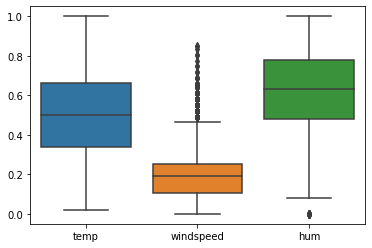

In [22]:
fig,ax = plt.subplots(ncols=1)
sns.boxplot(data=hour_data[['temp', 'windspeed', 'hum']],ax=ax)

As seen in the Boxplot, the **windspeed** has outliers which begin from around 0.5 upwards.  To lessen the impact of these outliers on the **windspeed** feature, we will use the clip function to trim values above a suitable threshold. 
In this case, above 0.6.
All values above this threshold will be set to 0.6.

As seen in the Boxplot, the **hum** has outliers which are from below around 0.1 and lower.  To lessen the impact of these outliers on the **hum** feature, we will use the clip function to trim values below a suitable threshold. 
In this case, below 0.05.
All values above this threshold will be set to 0.05.

In [23]:
hour_data["windspeed"] = hour_data["windspeed"].clip(upper=0.6)
hour_data["hum"] = hour_data["hum"].clip(lower=0.05)

Create the boxplot again to see that the outliers have been suitably clipped.

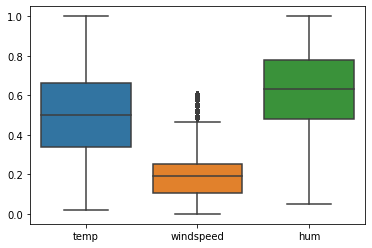

In [24]:
fig,ax = plt.subplots(ncols=1)
sns.boxplot(data=hour_data[['temp', 'windspeed', 'hum']],ax=ax)

## Skewness of the variables 

Lets now look at the skewness of the target variable, and of the numeric variables:
* cnt
* temp
* windspeed
* hum

Lets plot some histograms and look at the distributions.

Firstly, the target variable, cnt.

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

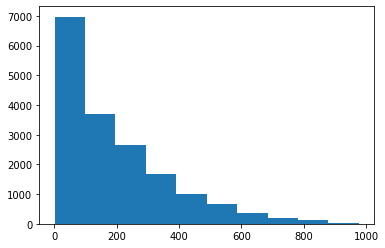

In [25]:
plt.hist(hour_data['cnt'])

From the plot above, the target variable's data appears to be right skewed. 
Therefore, we will replace the value of hour_data['cnt'] with its square root in order to flatten it. 

In [26]:
hour_data['cnt'] = np.sqrt(hour_data['cnt'])

Plot the histogram again, to see if the skewdness has been flattened:

(array([2653., 2168., 2254., 2714., 2764., 2076., 1380.,  840.,  379.,
         151.]),
 array([ 1.        ,  4.02569992,  7.05139984, 10.07709976, 13.10279969,
        16.12849961, 19.15419953, 22.17989945, 25.20559937, 28.23129929,
        31.25699922]),
 <a list of 10 Patch objects>)

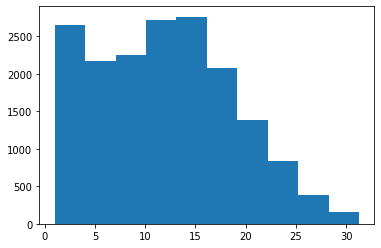

In [27]:
plt.hist(hour_data['cnt'])

It has flattened.

Next, the features temp and windspeed.

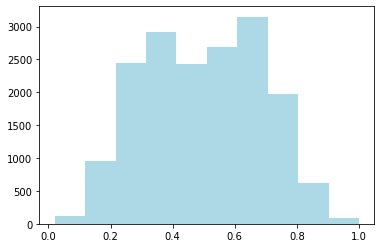

In [28]:
plt.hist(hour_data['temp'], color='lightblue');

The temp distribution does not look skewed.  Therefore, we do not need to flatten it.

Next, windspeed:

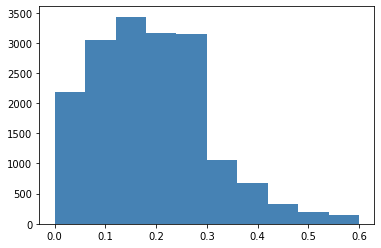

In [29]:
plt.hist(hour_data['windspeed'], color='steelblue');

From the plot above, the windspeed variable's data appears to be right skewed. 
Therefore, we will replace the value of hour_data['windspeed'] with its square root in order to flatten it. 

(array([2180.,    0.,    0., 1425., 3355., 3352., 3856., 1870.,  999.,
         342.]),
 array([0.        , 0.07745967, 0.15491933, 0.232379  , 0.30983867,
        0.38729833, 0.464758  , 0.54221767, 0.61967734, 0.697137  ,
        0.77459667]),
 <a list of 10 Patch objects>)

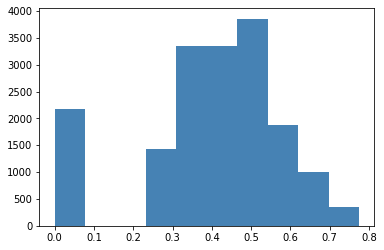

In [30]:
hour_data['windspeed4'] = np.sqrt(hour_data['windspeed'])
plt.hist(hour_data['windspeed4'], color='steelblue')

In [31]:
hour_data.head()

,yr,mnth,hr,temp,hum,windspeed,cnt,season_1,season_2,season_3,...,hr_time_15,hr_time_16,hr_time_17,hr_time_18,hr_time_19,hr_time_20,hr_time_21,hr_time_22,hr_time_23,windspeed4
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0,0.24,0.81,0.0,4.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2011-01-01 01:00:00,0,1,1,0.22,0.80,0.0,6.324555,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2011-01-01 02:00:00,0,1,2,0.22,0.80,0.0,5.656854,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2011-01-01 03:00:00,0,1,3,0.24,0.75,0.0,3.605551,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2011-01-01 04:00:00,0,1,4,0.24,0.75,0.0,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## Explanatory Analysis

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

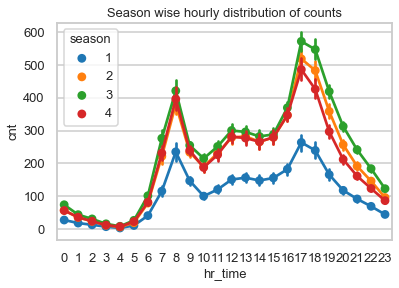

In [32]:
hour_EDA['hr_time'] = hour_EDA.hr.astype('category')
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=0.5, rc={"lines.linewidth": 1.5})
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',}

plt.rcParams.update(params)

fig,ax = plt.subplots()
sns.pointplot(data=hour_EDA[['hr_time',
                           'cnt',
                           'season']],
              x='hr_time',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

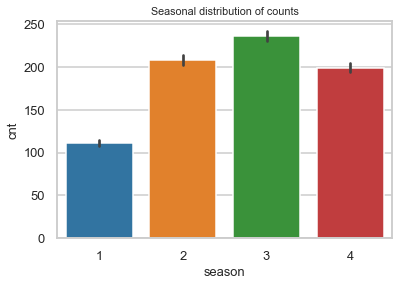

In [33]:
# Seasonal distribution of count
fig,ax = plt.subplots()
sns.barplot(data=hour_EDA[['season', 'cnt']],
              x='season', y='cnt', ax=ax)
sns.set_context('talk', font_scale=0.6, rc={"lines.linewidth": 1.5})
ax.set(title="Seasonal distribution of counts")

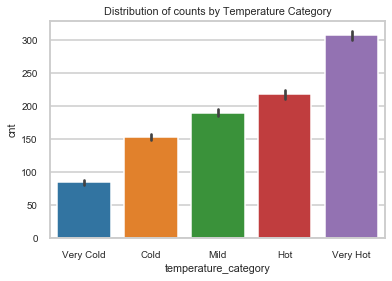

In [34]:
# binning into 5 different temperature bins for ploting

bin_labels_temp = ['Very Cold', 'Cold', 'Mild', 'Hot', 'Very Hot']
hour_EDA['temperature_category'] = pd.qcut(hour_EDA['temp'],  q=[0, .2, .4, .6, .8, 1],
                                    labels = bin_labels_temp)

hour_EDA.head()
fig,ax = plt.subplots()
sns.barplot(data=hour_EDA[['temperature_category', 'cnt']], x = 'temperature_category',
              y = 'cnt', ax = ax)
ax.set(title="Distribution of counts by Temperature Category")
hour_EDA = hour_EDA.drop(["temperature_category"], axis=1)

In [35]:
type(hour_data)

pandas.core.frame.DataFrame

[Text(0.5, 1.0, 'Distribution of counts by weathersit')]

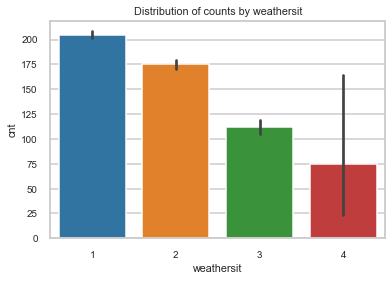

In [36]:
# Ploting distribution of counts by wheathersit
fig,ax = plt.subplots()
sns.barplot(data=hour_EDA[['weathersit',
                           'cnt']],
              x='weathersit',
              y='cnt',
              ax=ax)
sns.set_context('talk', font_scale=0.6, rc={"lines.linewidth": 1.5})
ax.set(title="Distribution of counts by weathersit")

Hourly Count graph where we can explore how many bicycles are use per hour

In [37]:
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


#### Weekly Count

Let's now gain more insight by resampling the data by week:

In [38]:
#Converting CNT to its normal state for doing graphs
#hour_EDA['cntnormal'] = hour_EDA['cnt']**2
#hour_EDA.head()

In [39]:
simple_hour_EDA = hour_EDA[["cnt", "registered"]] #only take these columns into the graph


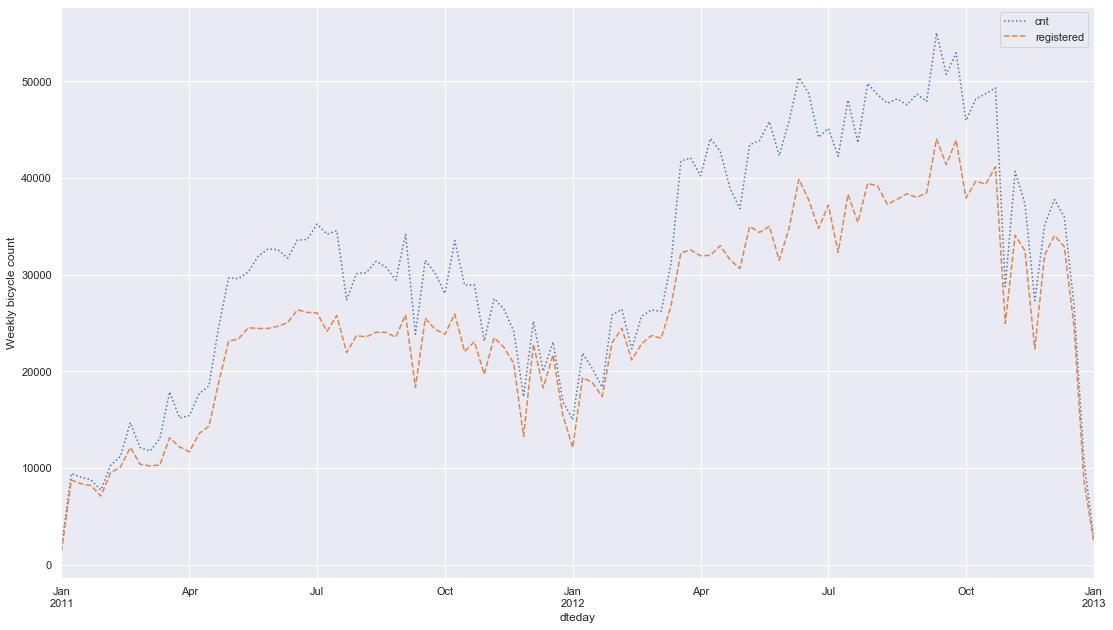

In [40]:
weekly = simple_hour_EDA.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


#### 30 day rolling mean

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we'll do a 30 day rolling mean of our data, making sure to center the window.


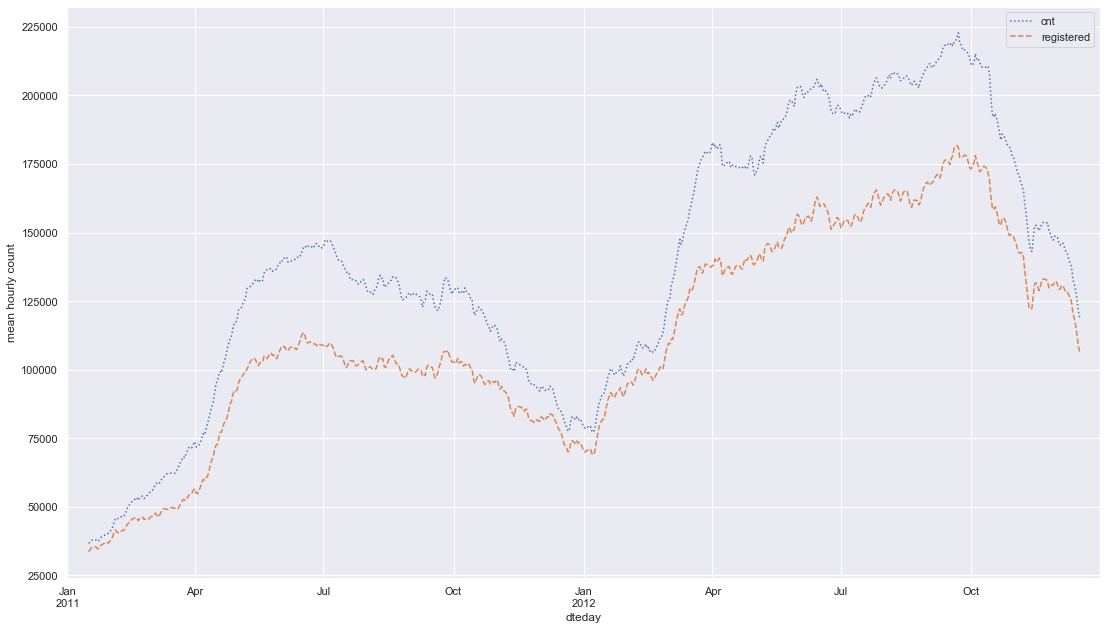

In [41]:
daily = simple_hour_EDA.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

 We are curious about how things change based on the day of the week:

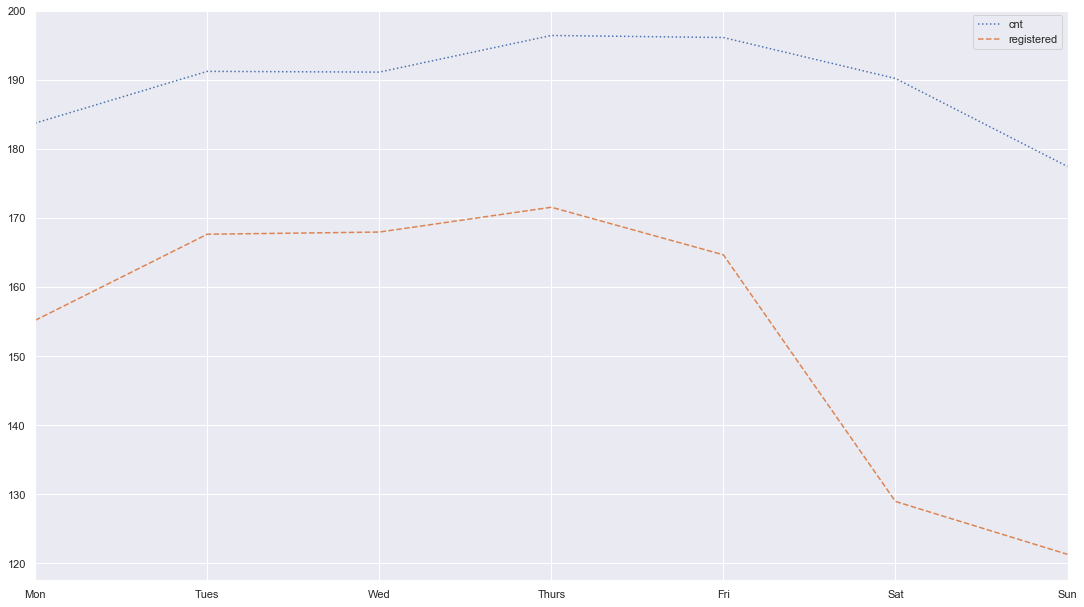

In [42]:
by_weekday = simple_hour_EDA.groupby(hour_EDA.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);
# note Jan 1st 2011, Saturday is a 6, Sunday is a 0. 
# e.g. 189 is the average of all Saturdays in the dataset
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Let's look at the hourly trend on weekdays versus weekends.

In [43]:
weekend_info_hour_EDA = hour_EDA[["cnt", "registered", "weekday"]] #only take these columns into the graph
#simple_hour_data = hour_data[["cnt", "casual", "registered"]] #only take these columns into the graph
weekend = np.where(weekend_info_hour_EDA.index.weekday < 5, 'Weekday', 'Weekend') #todo re-include the weekday into the plot
by_time = weekend_info_hour_EDA.groupby([weekend, weekend_info_hour_EDA.index.time]).mean()

Plot two panels side by side, for the Weekdays and Weekends

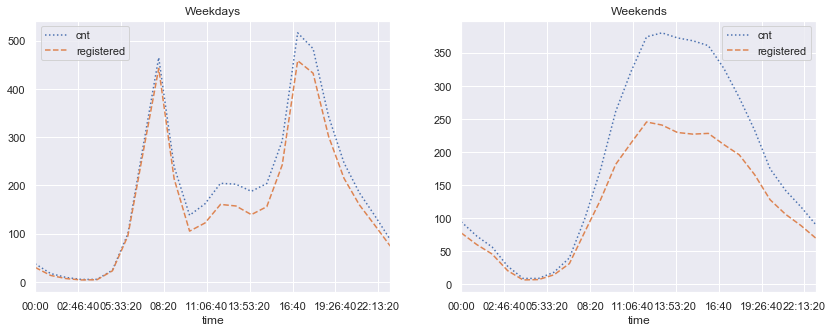

In [44]:
#Todo: use same scale for both
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                            style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                            style=[':', '--', '-']);

## Feature Engineering

Lets use Binning to create some new features for use in the model

Our first feature is "time of day" which is day bin by specific ranges of time

In [45]:
# Creating time of day
hour_data["time_of_day"] = 0

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:

#Binning time of day:
hour_data["time_of_day"][(hour_data["hr"] > 6) & (hour_data["hr"] < 13)] = 1
hour_data["time_of_day"][(hour_data["hr"] > 12) & (hour_data["hr"] < 19)] = 2
hour_data["time_of_day"][(hour_data["hr"] > 18) & (hour_data["hr"] < 22)] = 3
hour_data["time_of_day"][(hour_data["hr"] > 21) & (hour_data["hr"] < 24)] = 4
hour_data["time_of_day"].head()


dteday
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
Name: time_of_day, dtype: int64

In [48]:
hour_data['hr'] = hour_data.hr.astype('category')
hour_data["time_of_day"].head()
hour_data = hour_data.drop(["hr"], axis=1)

Since temp is an important feature, lets create 5 bins for the temperature ranges.
We will use the same ones used in the plot above.

In [49]:
# binning into 5 different temperature bins

# They will be in order from 0 - 4, 0 being the coldest
hour_data['temperature_bin'] = pd.qcut(hour_data['temp'],  q=[0, .2, .4, .6, .8, 1],
                                    labels=False, precision=0)

Next, binning for humidity.


In [50]:
# binning into 5 different humidity bins

# They will be in order from 0 - 4, 0 being the coldest
hour_data['humidity_bin'] = pd.qcut(hour_data['hum'],  q=[0, .2, .4, .6, .8, 1],
                                    labels=False, precision=0)

Checking correlation with new features

In [51]:
correlation_matrix  = hour_data.corr() #correlations
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

In [52]:
#hour_data.summary()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 53 columns):
yr                 17379 non-null category
mnth               17379 non-null category
temp               17379 non-null float64
hum                17379 non-null float64
windspeed          17379 non-null float64
cnt                17379 non-null float64
season_1           17379 non-null uint8
season_2           17379 non-null uint8
season_3           17379 non-null uint8
season_4           17379 non-null uint8
holiday_0          17379 non-null uint8
holiday_1          17379 non-null uint8
weekday_0          17379 non-null uint8
weekday_1          17379 non-null uint8
weekday_2          17379 non-null uint8
weekday_3          17379 non-null uint8
weekday_4          17379 non-null uint8
weekday_5          17379 non-null uint8
weekday_6          17379 non-null uint8
workingday_0       17379 non-null uint8
workingday_1       17379 non-null uint8
we

After generating the matrix again, the list of the most important features looks like this:

    

Feature Name  | Correlation
------------- | -------------
registered       |0.97
temp and temperature_bin        |0.4
hr               |0.39
hum and humidity_bin     |-0.32
time_of_day      |0.31
yr               | 0.25

# Dimensionality reduction

### Droping temparary Variables 

In [53]:
#hour_data = hour_data.drop('cnt', axis=1)

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [55]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)
#hour_data.drop('datetime', axis = 1).values #temporaty
XPCA = hour_data.drop('cnt', axis = 1).values
yPCA = hour_data['cnt'].values
hour_data.head()

,yr,mnth,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_time_18,hr_time_19,hr_time_20,hr_time_21,hr_time_22,hr_time_23,windspeed4,time_of_day,temperature_bin,humidity_bin
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.81,0.0,4.000000,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,3
2011-01-01 01:00:00,0,1,0.22,0.80,0.0,6.324555,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,3
2011-01-01 02:00:00,0,1,0.22,0.80,0.0,5.656854,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,3
2011-01-01 03:00:00,0,1,0.24,0.75,0.0,3.605551,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,3
2011-01-01 04:00:00,0,1,0.24,0.75,0.0,1.000000,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,3


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(XPCA)
X_pca = pca.transform(XPCA)
print("original shape:   ", XPCA.shape)
print("transformed shape:", X_pca.shape)

original shape:    (17379, 52)
transformed shape: (17379, 20)


In [57]:
print(pca.explained_variance_)

[12.13242805  2.4308046   1.96348542  1.36983694  0.56397621  0.33591149
  0.25230292  0.24708338  0.14947311  0.14424236  0.14306656  0.14236647
  0.14134335  0.10328416  0.10040737  0.0670896   0.05904969  0.0426599
  0.04194722  0.04190774]


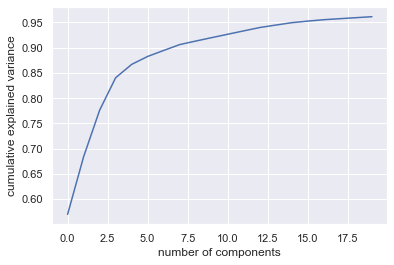

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

### Droping new generated features if needed

In [59]:
hour_data = hour_data.drop(['temperature_bin'], axis=1)

# Splitting Dataset with out using PCA

In [60]:
# Spliting Dataset into test
test_set = hour_data[hour_data.index >= "2012-10-01 00:00:00"]

In [61]:
# Spliting Dataset into training
train_set = hour_data[hour_data.index <= "2012-10-01 00:00:00"]

# Modeling

We ran 7 diferent types of model many time with diferent hiper parameters and using the new features and without the new features.

1)Simple Linear model - Baseline Model

2)Ridge Linear Regression

3)Lasso Model with cross Validation

4)Decision Tree Model with CV

5)Random Forest Model with CV and Grid Search

6)Random Forest Model with Ramdom Search

7)Simple Linear model - Baseline Model simple 

## Simple Linear model - Baseline Model

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
%matplotlib inline

In [65]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)

train_set = pd.DataFrame(train_set)
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values
print(X.shape, y.shape)

train_set.head()

(15212, 51) (15212,)


,yr,mnth,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_time_17,hr_time_18,hr_time_19,hr_time_20,hr_time_21,hr_time_22,hr_time_23,windspeed4,time_of_day,humidity_bin
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.81,0.0,4.000000,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 01:00:00,0,1,0.22,0.80,0.0,6.324555,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 02:00:00,0,1,0.22,0.80,0.0,5.656854,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 03:00:00,0,1,0.24,0.75,0.0,3.605551,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 04:00:00,0,1,0.24,0.75,0.0,1.000000,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3


In [66]:
#Training the Algorithm

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# Printing regresion coeficients
regressor.coef_

array([ 2.99735338e+00,  1.04923953e-01,  8.03188038e+00, -7.92857306e-02,
       -3.38537512e+00,  1.95444953e+12,  1.95444953e+12,  1.95444953e+12,
        1.95444953e+12, -1.70226822e+11, -1.47655141e+11, -3.92539472e+11,
       -4.15111153e+11, -4.15111153e+11, -4.15111153e+11, -4.15111153e+11,
       -4.15111153e+11, -3.92539472e+11,  2.42641930e+10,  4.68358746e+10,
        1.57357601e+11,  1.57357601e+11,  1.57357601e+11,  1.57357601e+11,
        1.27939273e+09,  1.27939273e+09,  1.27939273e+09,  1.27939273e+09,
        1.27939273e+09,  1.27939273e+09,  1.27939273e+09, -1.05552461e+10,
       -1.05552461e+10, -1.05552461e+10, -1.05552461e+10, -1.05552461e+10,
       -1.05552461e+10, -2.23898849e+10, -2.23898849e+10, -2.23898849e+10,
       -2.23898849e+10, -2.23898849e+10, -2.23898849e+10, -3.42245237e+10,
       -3.42245237e+10, -3.42245237e+10, -4.60591625e+10, -4.60591625e+10,
        1.48657227e+00,  1.18346388e+10, -2.96875000e-01])

## Making Predictions

In [68]:
# Defining test set
X = test_set.drop('cnt', axis = 1).values
y = test_set['cnt'].values
# Predicting Test Set
y_pred = regressor.predict(X)
# Calculating R2
r2_score(y, y_pred)

0.7370094086962105

In [69]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

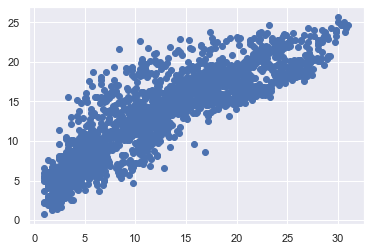

In [70]:
# Simple plot to check the predictions

plt.scatter(y, y_pred)

## Evaluating Algorithm

In [71]:
from sklearn import metrics
# Calculating R2
r2 = r2_score(y, y_pred)
print('R square:', r2)
#Calculating other Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

R square: 0.7370094086962105
Mean Absolute Error: 2.8423475218259515
Mean Squared Error: 13.327956649521932
Root Mean Squared Error: 3.650747409712418


## Model: Ridge Linear Regression

In [72]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)
train_set = pd.DataFrame(train_set)
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values
#Checking shape
print(X.shape, y.shape)

(15212, 51) (15212,)


In [73]:
#Dowloading Gridsearch
from sklearn.model_selection import  GridSearchCV

In [74]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression, Ridge
regressor = Ridge()
params = [{"alpha": [10,20,100,150,]}]
GridSearch = GridSearchCV(regressor, cv= 10, param_grid= params)
GridSearch.fit(X, y)
print(GridSearch.best_params_)

{'alpha': 20}


In [75]:
#Runing model to predict training set
y_pred = GridSearch.best_estimator_.predict(X)
r2_score(y, y_pred) #R2 of trainig set predicted

0.7864294371671148

## Prediction

Predicting the counts for the test data

In [76]:
# Split the test set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)
X = test_set.drop('cnt', axis = 1).values
y = test_set['cnt'].values

In [77]:
# Modeling the test set
y_pred = GridSearch.best_estimator_.predict(X)
r2_score(y, y_pred) #R2 for test prediction

0.7293998987001704

#### First model results
Mean Absolute Error: 21.95958770150908
Mean Squared Error: 1029.5066470607958
Root Mean Squared Error: 32.08592599662344


## Lasso Model with cross Validation

In [78]:
from sklearn.linear_model import LassoCV, Lasso

In [79]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values

In [80]:
# Define alpha space to select the best alphas (we use logspace in order to search for very small numbers close to cero)
alpha_space = np.logspace(-4, 0, 50)
alpha_space

array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.17947468e-03, 6.25055193e-03, 7.54312006e-03,
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])

In [81]:
# Define a cross validated lasso regression optimisation model that takes all the numbers in the alpha space to find one that minimizes mean squared error. 
lassocv = LassoCV(cv = 10, alphas = alpha_space, normalize = True,max_iter = 1e5)

In [82]:
# Train the lasso CV and find the Alpha that minimises the mean_squared error
lassocv.fit(X, y)
lassocv.alpha_

0.0001

In [83]:
# Define a Lasso function with the alpha found in the lasso CV model
lasso = Lasso(alpha = lassocv.alpha_, normalize=True)

In [84]:
# Final model is the Lasso regression with the optimised Alpha
model = lasso.fit(X, y)

In [85]:
# Defining test set
X = test_set.drop('cnt', axis = 1).values
y = test_set['cnt'].values

In [86]:
# Predict the y for the test set
y_pred = model.predict(X)

In [87]:
# Check R2
lasso.score(X, y)

0.7360898523669599

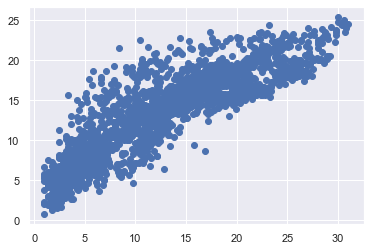

In [88]:
# Simple plot to check the predictions

plt.scatter(y, y_pred)

In [89]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 2.845841253456495
Mean Squared Error: 13.374558342883988
Root Mean Squared Error: 3.657124326965654


## Decision Tree Model with CV

In [90]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.tree import DecisionTreeRegressor

In [91]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)
train_set = pd.DataFrame(train_set)
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values
print(X.shape, y.shape)

(15212, 51) (15212,)


In [92]:
tree = DecisionTreeRegressor()
parameters = {'max_depth':range(1,40)}
clf = GridSearchCV(tree,cv= 10, param_grid = parameters, n_jobs=10)

In [93]:
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=10, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
tree_model = clf.best_estimator_
tree_model

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [95]:
# R2 before testing
y_pred = tree_model.predict(X)
r2_score(y, y_pred)

0.9680956046342681

In [96]:
print (clf.best_score_, clf.best_params_) 

0.8109594669425705 {'max_depth': 15}


In [97]:
# Defining test set
X = test_set.drop('cnt', axis = 1).values
y = test_set['cnt'].values

In [98]:
y_pred = tree_model.predict(X)

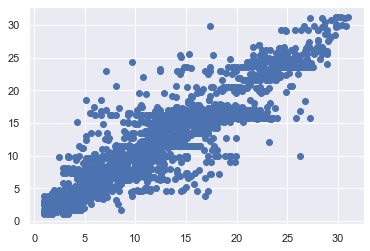

In [99]:
# Simple plot to check the predictions

plt.scatter(y, y_pred)

In [100]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 2.152446812048839
Mean Squared Error: 9.399769302966948
Root Mean Squared Error: 3.065904320582583


In [101]:
r2_score(y, y_pred)

0.8145213889786205

## Random Forest Model with CV and Grid Search

In [102]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)
train_set = pd.DataFrame(train_set)
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values
print(X.shape, y.shape)

(15212, 51) (15212,)


In [103]:
# Loading Library
from sklearn.ensemble import RandomForestRegressor

# Defining model with no gridsearch
Forest = RandomForestRegressor(n_estimators=20, random_state=0)
Forest.fit(X, y)

# Defining and tuning with GridSearch model
parameters = {'max_depth':[10, 15], 'min_samples_split':[20,30,35,40], 'min_samples_leaf':[10], 'n_estimators':[20, 21, 22, 23], 'max_leaf_nodes':[85]}
RFR = GridSearchCV(Forest,cv= 10, param_grid = parameters, n_jobs=10)


In [104]:
# Running  tunned model in train set
RFR.fit(X, y)

# Best paramater selection and optimization
Forest_model = RFR.best_estimator_
Forest_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=85,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=23,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [105]:
# R2 of the No GridSearch model before testing 
y_pred = Forest_model.predict(X)
r2_score(y, y_pred)

0.9013657089237768

In [106]:
hour_data.head()

,yr,mnth,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_time_17,hr_time_18,hr_time_19,hr_time_20,hr_time_21,hr_time_22,hr_time_23,windspeed4,time_of_day,humidity_bin
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.81,0.0,4.000000,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 01:00:00,0,1,0.22,0.80,0.0,6.324555,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 02:00:00,0,1,0.22,0.80,0.0,5.656854,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 03:00:00,0,1,0.24,0.75,0.0,3.605551,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3
2011-01-01 04:00:00,0,1,0.24,0.75,0.0,1.000000,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0,3


In [107]:
# Defining test set for model with no gridsearch
X = test_set.drop('cnt', axis = 1).values
y = test_set['cnt'].values

# Predicting Y for model with no gridsearch
y_pred = Forest.predict(X)

# R2
r2_score(y, y_pred)

0.8576985125273159

## Random Forest Model with Ramdom Search

In [108]:
# Importing new Libraries
from sklearn.model_selection import RandomizedSearchCV

In [109]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)
train_set = pd.DataFrame(train_set)
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values
print(X.shape, y.shape)

(15212, 51) (15212,)


In [110]:
# Defining Algorithm
Forest = RandomForestRegressor()
Forest.fit(X, y)

# RamdomSearch
# Defining Hiperparameters
max_depth = [10]
min_samples_split = [20,30,35,40]
min_samples_leaf = [10] 
bootstrap = [True]
n_estimators=[20, 21, 22, 23]
max_leaf_nodes = [85]

# Ramdom search optimization of hiperparameters
RFR = RandomizedSearchCV(Forest,cv= 10, param_distributions  = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf, 'bootstrap':bootstrap, 'n_estimators': n_estimators, 'max_leaf_nodes': max_leaf_nodes},scoring="r2",verbose=0, n_jobs=4)

In [111]:
# Running model
RFR.fit(X, y)
print(RFR.best_params_)

{'n_estimators': 21, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': 85, 'max_depth': 10, 'bootstrap': True}


In [112]:
# R2 before testing
y_pred = Forest.predict(X)
r2_score(y, y_pred)

0.9906802682557525

In [113]:
# Modeling test set
X = test_set.drop('cnt', axis = 1).values
y = test_set['cnt'].values
# Modeling
y_pred = Forest.predict(X)

In [114]:
r2_score(y, y_pred)

0.847451910381727

# Spliting Dataset for PCA

In [115]:
# Spliting Dataset into test
X_pca=pd.DataFrame(X_pca,index=hour_data.index)
X_pca.insert(0,'cnt',hour_data['cnt'])
test_set= X_pca[X_pca.index >= "2012-10-01 00:00:00"]

In [116]:
# Spliting Dataset into training

In [117]:
train_set=pd.DataFrame(X_pca,index=hour_data.index)
train_set= X_pca[X_pca.index <= "2012-10-01 00:00:00"]

# Linear Model with PCA

In [118]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)

train_set = pd.DataFrame(train_set)
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values
print(X.shape, y.shape)

(15212, 20) (15212,)


In [119]:
#Training the Algorithm
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
# Printing regresion coeficients
regressor.coef_

array([-0.27244506,  2.48514415, -0.12444222,  0.63990634, -0.0510951 ,
        1.2995832 ,  0.64606207, -2.70041728, -0.27540745, -0.13345675,
        0.17414084, -0.07267952,  0.06895529,  1.10841401, -1.63700965,
        0.38054784, -0.57801865, -4.60459713, -4.35359493, -0.33920039])

In [121]:
# Predicting Validation set Set
y_pred = regressor.predict(X)
# Calculating R2
r2_score(y, y_pred)

0.49035252893126036

## Making Predictions

In [122]:
# Defining test set
X = test_set.drop('cnt', axis = 1).values
y = test_set['cnt'].values
# Predicting Test Set
y_pred = regressor.predict(X)
# Calculating R2
r2_score(y, y_pred)

0.3915629705884959

In [123]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

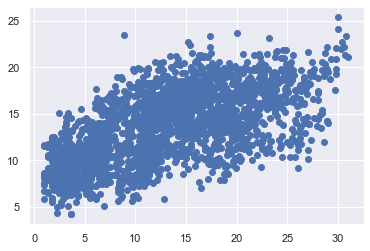

In [124]:
# Simple plot to check the predictions

plt.scatter(y, y_pred)

## Evaluating Algorithm

In [125]:
from sklearn import metrics
# Calculating R2
r2 = r2_score(y, y_pred)
print('R square:', r2)
# Calculating other Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

R square: 0.3915629705884959
Mean Absolute Error: 4.594222228803609
Mean Squared Error: 30.834648158926658
Root Mean Squared Error: 5.552895475238721



## XG Boost

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_friedman1
X = train_set.drop('cnt', axis = 1).values
y = train_set['cnt'].values


In [136]:
est = GradientBoostingRegressor()


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [140]:
#parameters= {"n_estimators":[1000,100], "learning_rate":[0.1,0.01], "random_state":0, "loss":'ls'}
XG = RandomizedSearchCV(est, cv= 10, param_distributions = {"n_estimators":[1000,100], "learning_rate":[0.1,0.01], "random_state":0, "loss":'ls'} , scoring="r2",verbose=0, n_jobs=4 )


In [141]:
#Running model
XG.fit(X, y)
#print(RFR.best_params_)


TypeError: Parameter grid value is not iterable (key='random_state', value=0)

In [135]:
#Predi
y_pred = XG.predict(X)
r2_score(y, y_pred)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.